In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/home/aditya/covid.csv")
data

Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]

In [3]:
data.shape

(321, 6)

In [4]:
data.isnull()

Date  State  Region  Confirmed  Deaths  Recovered
0    False   True   False      False   False      False
1    False   True   False      False   False      False
2    False   True   False      False   False      False
3    False   True   False      False   False      False
4    False   True   False      False   False      False
..     ...    ...     ...        ...     ...        ...
316  False  False   False      False   False      False
317  False  False   False      False   False      False
318  False  False   False      False   False      False
319  False  False   False      False   False      False
320  False  False   False      False   False      False

[321 rows x 6 columns]

In [10]:
data['State'].isnull().value_counts()

True     181
False    140
Name: State, dtype: int64

In [13]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [14]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [17]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [18]:
321-140

181

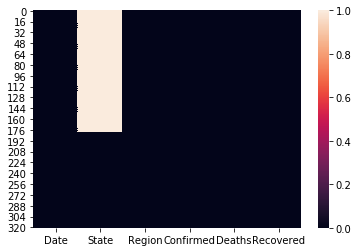

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

In [20]:
data.groupby('Region')

In [21]:
data.groupby('Region').sum()

Confirmed  Deaths  Recovered
Region                                          
Afghanistan              1939      60        252
Albania                   766      30        455
Algeria                  3848     444       1702
Andorra                   743      42        423
Angola                     27       2          7
...                       ...     ...        ...
West Bank and Gaza        344       2         71
Western Sahara              6       0          5
Yemen                       6       0          1
Zambia                     97       3         54
Zimbabwe                   32       4          5

[187 rows x 3 columns]

In [30]:
data.groupby('Region')['Deaths','Recovered'].sum().sort_values(by='Recovered',ascending=False)

/home/aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Deaths  Recovered
Region                             
Spain              24275     132929
US                 60967     120720
Germany             6467     120400
Mainland China      4633      77610
Iran                5957      73791
...                  ...        ...
Cabo Verde             1          2
Yemen                  0          1
South Sudan            0          0
Papua New Guinea       0          0
MS Zaandam             2          0

[187 rows x 2 columns]

In [36]:
data.groupby('Region').Confirmed.value_counts()

Region              Confirmed
Afghanistan         1939         1
Albania             766          1
Algeria             3848         1
Andorra             743          1
Angola              27           1
                                ..
West Bank and Gaza  344          1
Western Sahara      6            1
Yemen               6            1
Zambia              97           1
Zimbabwe            32           1
Name: Confirmed, Length: 320, dtype: int64

In [38]:
data.Confirmed<10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [42]:
data[~(data.Confirmed<10)]

Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[304 rows x 6 columns]

In [44]:
data=data[~(data.Confirmed<10)]
data

Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[304 rows x 6 columns]

In [61]:
m=data.groupby('Region').Confirmed.sum().sort_values(ascending=False)
m

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Holy See           10
Gambia             10
Suriname           10
Name: Confirmed, Length: 180, dtype: int64

In [63]:
m1=data.groupby('Region').Deaths.sum().sort_values()
m1

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

In [64]:
data[data.Region=='India']

Date State Region  Confirmed  Deaths  Recovered
74  4/29/2020   NaN  India      33062    1079       8437

In [65]:
data.sort_values(by='Confirmed')

Date      State    Region  Confirmed  Deaths  Recovered
156  4/29/2020        NaN  Suriname         10       1          8
70   4/29/2020        NaN  Holy See         10       0          2
59   4/29/2020        NaN    Gambia         10       1          8
318  4/29/2020      Yukon    Canada         11       0          0
217  4/29/2020  Greenland   Denmark         11       0         11
..         ...        ...       ...        ...     ...        ...
57   4/29/2020        NaN    France     165093   24087      48228
168  4/29/2020        NaN        UK     165221   26097          0
80   4/29/2020        NaN     Italy     203591   27682      71252
153  4/29/2020        NaN     Spain     236899   24275     132929
265  4/29/2020   New York        US     299691   23477          0

[304 rows x 6 columns]

In [69]:
data.sort_values(by='Recovered',ascending=False).head(50)

Date            State                Region  Confirmed  Deaths  \
153  4/29/2020              NaN                 Spain     236899   24275   
61   4/29/2020              NaN               Germany     161539    6467   
76   4/29/2020              NaN                  Iran      93657    5957   
80   4/29/2020              NaN                 Italy     203591   27682   
229  4/29/2020            Hubei        Mainland China      68128    4512   
57   4/29/2020              NaN                France     165093   24087   
167  4/29/2020              NaN                Turkey     117589    3081   
22   4/29/2020              NaN                Brazil      79685    5513   
158  4/29/2020              NaN           Switzerland      29407    1716   
78   4/29/2020              NaN               Ireland      20253    1190   
8    4/29/2020              NaN               Austria      15402     580   
107  4/29/2020              NaN                Mexico      17799    1732   
15   4/29/2020              NaN               Belgium      47859    7501   
134  4/29/2020              NaN                Russia      99399     972   
128  4/29/2020              NaN                  Peru      33931     943   
151  4/29/2020              NaN           South Korea      10765     247   
74   4/29/2020              NaN                 India      33062    1079   
79   4/29/2020              NaN                Israel      15834     215   
33   4/29/2020              NaN                 Chile      14885     216   
42   4/29/2020              NaN               Denmark       9008     443   
101  4/29/2020              NaN              Malaysia       5945     100   
133  4/29/2020              NaN               Romania      11978     693   
124  4/29/2020              NaN              Pakistan      15525     343   
97   4/29/2020              NaN            Luxembourg       3769      89   
41   4/29/2020              NaN        Czech Republic       7579     227   
130  4/29/2020              NaN                Poland      12640     624   
141  4/29/2020              NaN          Saudi Arabia      21402     157   
56   4/29/2020              NaN               Finland       4906     206   
162  4/29/2020              NaN              Thailand       2947      54   
83   4/29/2020              NaN                 Japan      13895     413   
171  4/29/2020              NaN  United Arab Emirates      11929      98   
264  4/29/2020  New South Wales             Australia       3016      40   
150  4/29/2020              NaN          South Africa       5350     103   
14   4/29/2020              NaN               Belarus      13181      84   
2    4/29/2020              NaN               Algeria       3848     444   
73   4/29/2020              NaN               Iceland       1797      10   
47   4/29/2020              NaN               Ecuador      24675     883   
220  4/29/2020        Guangdong        Mainland China       1588       8   
131  4/29/2020              NaN              Portugal      24505     973   
11   4/29/2020              NaN               Bahrain       2921       8   
34   4/29/2020              NaN              Colombia       6207     278   
75   4/29/2020              NaN             Indonesia       9771     784   
88   4/29/2020              NaN                Kuwait       3740      24   
77   4/29/2020              NaN                  Iraq       2003      92   
48   4/29/2020              NaN                 Egypt       5268     380   
309  4/29/2020         Victoria             Australia       1361      18   
38   4/29/2020              NaN               Croatia       2062      67   
9    4/29/2020              NaN            Azerbaijan       1766      23   
320  4/29/2020         Zhejiang        Mainland China       1268       1   
227  4/29/2020            Henan        Mainland China       1276      22   

     Recovered  
153     132929  
61      120400  
76       73791  
80       71252  
229      63616  
57       48228  
167      44040